<a href="https://colab.research.google.com/github/nicholasoxford/4dviews_vuforia_AR/blob/master/CrimeData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
!pip install geopandas
!pip install shapely
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [ ]:

# https://www.atlantapd.org/home/showpublisheddocument/4080
df = pd.read_csv('/content/drive/MyDrive/COBRA-2021.csv')
dfMurder = df.loc[df['UC2_Literal'] == 'HOMICIDE']
dfMurder.set_index('rpt_date')
# https://www.arcgis.com/home/item.html?id=94bce05f7feb4a7ca63cffa0de29833d
street_map = gpd.read_file('/content/drive/MyDrive/GC_Roads/GC_RD_GA/Roads_Atlanta_GA.shp')
crs = {'init':'espc:4326'}
geometry = [Point(xy) for xy in zip(dfMurder['long'], dfMurder['lat'])]

geo_df = gpd.GeoDataFrame(dfMurder, crs="EPSG:4326", geometry=geometry)
street_map.to_crs(epsg='4236')


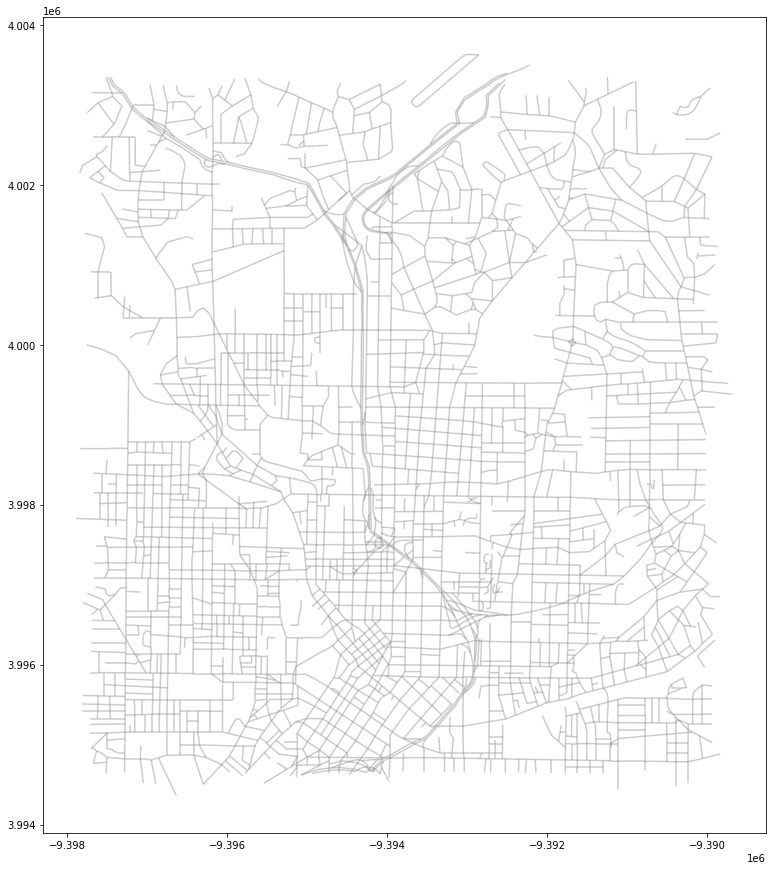

In [101]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4,color='grey')

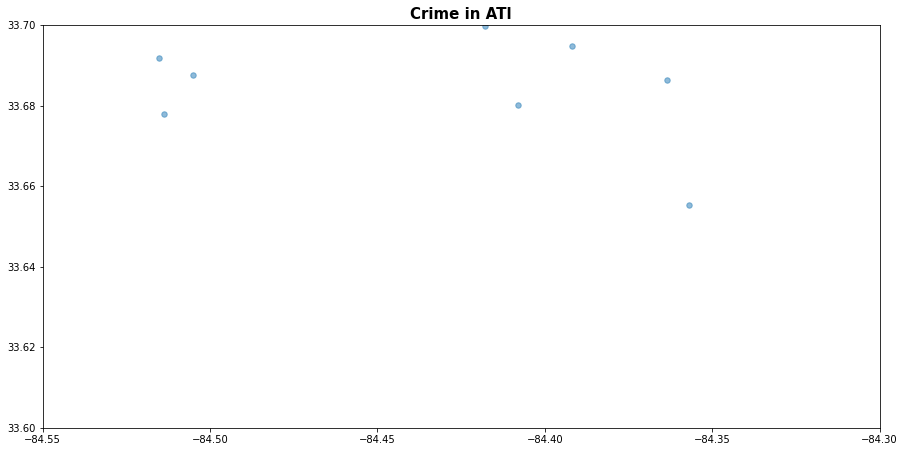

In [97]:

# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(ax=ax,alpha=0.5, legend=True,markersize=30)
# add title to graph
plt.title('Crime in ATl', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(-84.55,-84.3)
plt.ylim( 33.6, 33.7)
# show map
plt.show()
